In [56]:
import pandas as pd
import matplotlib.pyplot as plt 
df = pd.read_csv('csv/new_dataset.csv')
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_posted_month'] = df.job_posted_date.dt.strftime('%b')
df['job_posted_month_number'] = df['job_posted_date'].dt.month
df = df.drop(columns=df.columns[0])
df.set_index('job_id')

,company_id,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,job_posted_month,skills,type,job_posted_month_number
job_id,,,,,,,,,,,,,,,,,,,
0,0,Data Analyst,Marketing Data Analyst,Anywhere,via LinkedIn,Full-time,True,Serbia,2023-09-25 17:46:06,False,False,Serbia,NaN,NaN,NaN,Sep,sql,programming,9
0,0,Data Analyst,Marketing Data Analyst,Anywhere,via LinkedIn,Full-time,True,Serbia,2023-09-25 17:46:06,False,False,Serbia,NaN,NaN,NaN,Sep,python,programming,9
0,0,Data Analyst,Marketing Data Analyst,Anywhere,via LinkedIn,Full-time,True,Serbia,2023-09-25 17:46:06,False,False,Serbia,NaN,NaN,NaN,Sep,excel,analyst_tools,9
0,0,Data Analyst,Marketing Data Analyst,Anywhere,via LinkedIn,Full-time,True,Serbia,2023-09-25 17:46:06,False,False,Serbia,NaN,NaN,NaN,Sep,tableau,analyst_tools,9
0,0,Data Analyst,Marketing Data Analyst,Anywhere,via LinkedIn,Full-time,True,Serbia,2023-09-25 17:46:06,False,False,Serbia,NaN,NaN,NaN,Sep,power bi,analyst_tools,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452207,154,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Mar,spark,libraries,3
1452207,154,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Mar,hadoop,libraries,3
1452207,154,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Mar,kafka,libraries,3


In [57]:
job_title_list = ['Data Analyst','Data Scientist','Data Engineer']

In [58]:
df_can = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Canada')].copy()
df_can = df_can.dropna(subset=['salary_year_avg'])
df_us = df[(df['job_title_short']== 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_us = df_us.dropna(subset=['salary_year_avg'])

In [59]:
df_can_goup = df_can.groupby('skills')['salary_year_avg'].agg(['count', 'median'])
df_us_group = df_us.groupby('skills')['salary_year_avg'].agg(['count', 'median'])

In [60]:
df_can_goup_high_p = df_can_goup.sort_values(by='median', ascending=False).head(10)
df_us_goup_high_p = df_us_group.sort_values(by='median', ascending=False).head(10)

In [61]:
df_can_goup_high_count = df_can_goup.sort_values(by='count', ascending=False).head(10)
df_us_goup_high_count = df_us_group.sort_values(by='count', ascending=False).head(10)

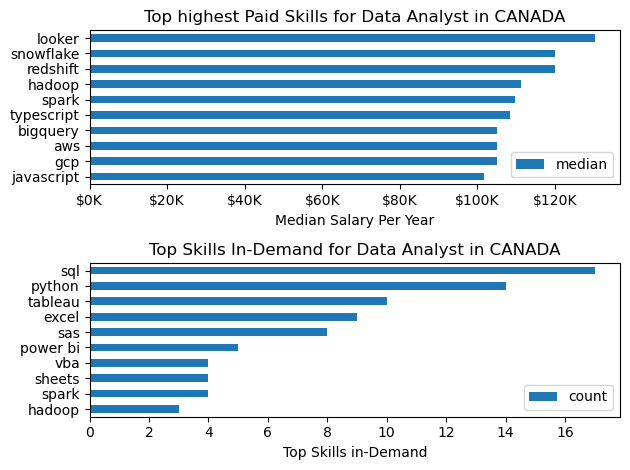

In [62]:
fig, ax = plt.subplots(2,1)
#The following is to reverse the chart [::-1], instead of using ax[0]invert_yaxis()
df_can_goup_high_count[::-1].plot(kind='barh', y='count', ax=ax[1])  
df_can_goup_high_p[::-1].plot(kind='barh', y='median', ax=ax[0])
ax[1].set_title('Top Skills In-Demand for Data Analyst in CANADA')
ax[1].set_xlabel('Top Skills in-Demand')
ax[1].set_ylabel('')
ax[0].set_title('Top highest Paid Skills for Data Analyst in CANADA')
ax[0].set_xlabel('Median Salary Per Year')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}K'))
fig.tight_layout()


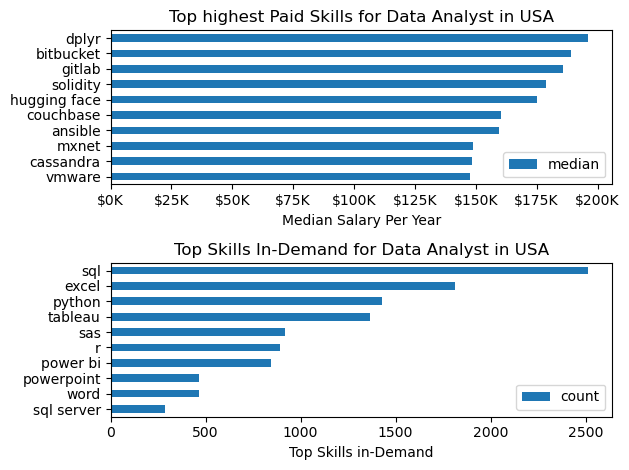

In [63]:
fig, ax = plt.subplots(2,1)
df_us_goup_high_p[::-1].plot(kind='barh', y='median', ax=ax[0])
df_us_goup_high_count[::-1].plot(kind='barh', y='count', ax=ax[1])
ax[1].set_title('Top Skills In-Demand for Data Analyst in USA')
ax[1].set_xlabel('Top Skills in-Demand')
ax[1].set_ylabel('')
ax[0].set_title('Top highest Paid Skills for Data Analyst in USA')
ax[0].set_xlabel('Median Salary Per Year')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}K'))
fig.tight_layout()

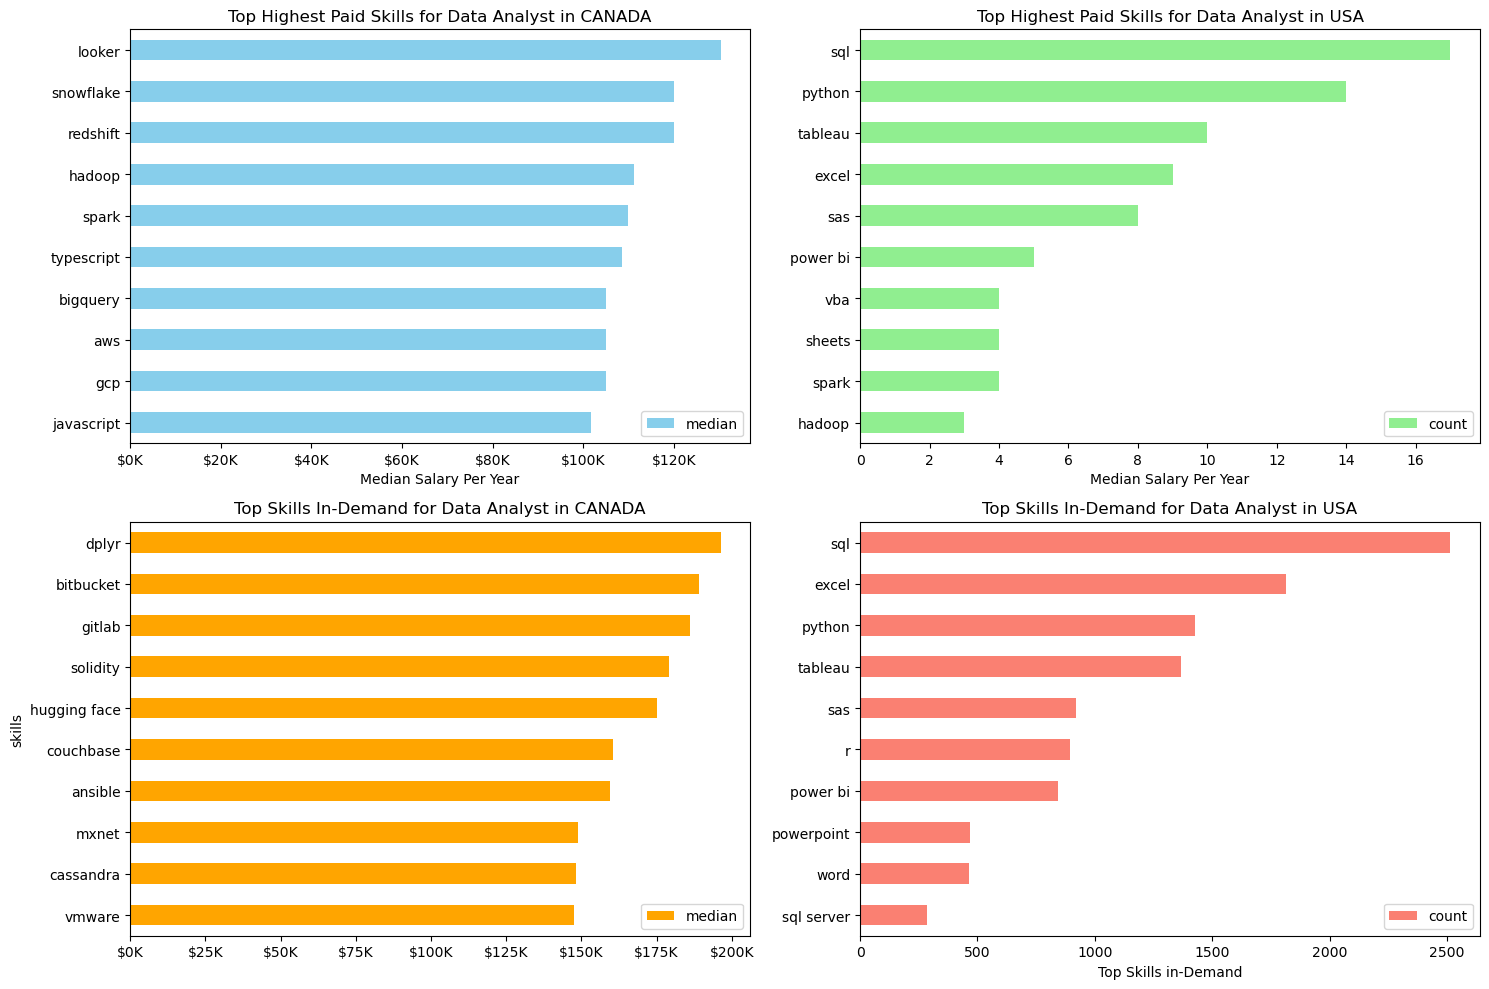

In [69]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Plot for Canada
df_can_goup_high_p[::-1].plot(kind='barh', y='median', ax=ax[0, 0], color='skyblue')
df_can_goup_high_count[::-1].plot(kind='barh', y='count', ax=ax[0, 1], color='lightgreen')

# Set title and labels for the top highest paid skills plot in Canada
ax[0, 0].set_title('Top Highest Paid Skills for Data Analyst in CANADA')
ax[0, 0].set_xlabel('Median Salary Per Year')
ax[0, 0].set_ylabel('')
# Format the x-axis to display salary in thousands
ax[0, 0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

# Set title and labels for the top skills in-demand plot in Canada
ax[1, 0].set_title('Top Skills In-Demand for Data Analyst in CANADA')
ax[1, 0].set_xlabel('Top Skills in-Demand')
ax[1, 0].set_ylabel('')

# Plot for USA
# Plot the median salaries for top highest paid skills in the USA
df_us_goup_high_p[::-1].plot(kind='barh', y='median', ax=ax[1, 0], color='orange')
# Plot the counts for top skills in-demand in the USA
df_us_goup_high_count[::-1].plot(kind='barh', y='count', ax=ax[1, 1], color='salmon')

# Set title and labels for the top highest paid skills plot in the USA
ax[0, 1].set_title('Top Highest Paid Skills for Data Analyst in USA')
ax[0, 1].set_xlabel('Median Salary Per Year')
ax[0, 1].set_ylabel('')
# Format the x-axis to display salary in thousands
ax[1, 0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

# Set title and labels for the top skills in-demand plot in the USA
ax[1, 1].set_title('Top Skills In-Demand for Data Analyst in USA')
ax[1, 1].set_xlabel('Top Skills in-Demand')
ax[1, 1].set_ylabel('')

# Adjust layout to prevent overlap
fig.tight_layout()
# Display the plots
plt.show()